In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import plotly.express as px
import cufflinks as cf

In [2]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [3]:
df = pd.read_excel('data/EurA1c_report_definitief.xlsx')
df

,Method name,N,Mean,Bias,CV,Sample,Refrence Value,Year,Source,Type,Manufacturer
0,(part of cobas 6000/8000) Roche Diagnostics co...,10.0,74.0,3.9,2.7,Sample 1,70.1,2019,EURA1c,Frozen,Roche Diagnostics
1,(part of cobas 6000/8000) Roche Diagnostics co...,10.0,40.6,2.4,4.6,Sample 2,38.2,2019,EURA1c,Frozen,Roche Diagnostics
2,Abbott Alinity,17.0,34.0,-2.5,8.2,Sample 1,37.5,2020,EURA1c,Frozen,Abbot
3,Abbott Alinity,15.0,34.2,-2.3,8.2,Sample 2,37.5,2020,EURA1c,Frozen,Abbot
4,Abbott Alinity,12.0,36.1,-0.4,2.1,Sample 1,37.1,2020,EURA1c,Fresh,Abbot
...,...,...,...,...,...,...,...,...,...,...,...
509,Trinity Biotech Premier Hb9210,27.0,59.7,1.8,4.0,Sample 2,57.9,2016,EURA1c,Fresh,Trinity Biotech
510,Trinity Biotech Premier Hb9210,20.0,45.0,0.8,2.2,Sample 1,44.2,2017,EURA1c,Frozen,Trinity Biotech
511,Trinity Biotech Premier Hb9210,21.0,58.0,0.0,2.4,Sample 2,58.0,2017,EURA1c,Frozen,Trinity Biotech
512,Trinity Biotech Premier Hb9210,29.0,45.3,1.1,3.7,Sample 1,44.2,2017,EURA1c,Fresh,Trinity Biotech


In [4]:
# test = df2.loc[:, df2.columns != 'Year']
df2 = df.groupby(['Method name','Year']).mean().reset_index()
df2.tail(20)

,Method name,Year,N,Mean,Bias,CV,Refrence Value
141,Tosoh G7,2016,30.25,50.450,0.350,5.200,50.10
142,Tosoh G7,2017,23.25,52.425,1.325,4.425,51.10
143,Tosoh G7,2018,20.25,51.500,1.350,4.750,50.15
144,Tosoh G7,2019,19.00,54.000,-0.150,6.850,54.15
145,Tosoh G7,2020,27.00,37.550,1.050,6.125,37.30
146,Tosoh G8,2016,159.00,50.225,0.125,3.275,50.10
147,Tosoh G8,2017,180.00,51.750,0.650,3.200,51.10
148,Tosoh G8,2018,223.75,51.325,1.175,3.400,50.15
149,Tosoh G8,2019,352.50,56.150,2.000,2.650,54.15
150,Tosoh G8,2020,232.75,37.900,1.400,3.175,37.30


In [5]:
df3 = df2.set_index('Method name')
df3

,Year,N,Mean,Bias,CV,Refrence Value
Method name,,,,,,
(part of cobas 6000/8000) Roche Diagnostics cobas c 513,2019,10.00,57.300,3.150,3.650,54.15
Abbott ARCHITECT,2017,34.25,49.525,-1.575,5.100,51.10
Abbott ARCHITECT,2018,58.50,47.925,-2.225,5.050,50.15
Abbott ARCHITECT (enzymatic),2016,22.50,48.025,-2.075,3.800,50.10
Abbott ARCHITECT (enzymatic),2019,31.50,54.000,-0.150,3.800,54.15
...,...,...,...,...,...,...
Trinity Biotech Premier Hb9210,2016,21.50,50.250,0.150,3.725,50.10
Trinity Biotech Premier Hb9210,2017,24.75,51.950,0.850,2.775,51.10
Trinity Biotech Premier Hb9210,2018,27.00,50.500,0.350,3.800,50.15


In [6]:
df4 = df.set_index('Method name')
df4

,N,Mean,Bias,CV,Sample,Refrence Value,Year,Source,Type,Manufacturer
Method name,,,,,,,,,,
(part of cobas 6000/8000) Roche Diagnostics cobas c 513,10.0,74.0,3.9,2.7,Sample 1,70.1,2019,EURA1c,Frozen,Roche Diagnostics
(part of cobas 6000/8000) Roche Diagnostics cobas c 513,10.0,40.6,2.4,4.6,Sample 2,38.2,2019,EURA1c,Frozen,Roche Diagnostics
Abbott Alinity,17.0,34.0,-2.5,8.2,Sample 1,37.5,2020,EURA1c,Frozen,Abbot
Abbott Alinity,15.0,34.2,-2.3,8.2,Sample 2,37.5,2020,EURA1c,Frozen,Abbot
Abbott Alinity,12.0,36.1,-0.4,2.1,Sample 1,37.1,2020,EURA1c,Fresh,Abbot
...,...,...,...,...,...,...,...,...,...,...
Trinity Biotech Premier Hb9210,27.0,59.7,1.8,4.0,Sample 2,57.9,2016,EURA1c,Fresh,Trinity Biotech
Trinity Biotech Premier Hb9210,20.0,45.0,0.8,2.2,Sample 1,44.2,2017,EURA1c,Frozen,Trinity Biotech
Trinity Biotech Premier Hb9210,21.0,58.0,0.0,2.4,Sample 2,58.0,2017,EURA1c,Frozen,Trinity Biotech


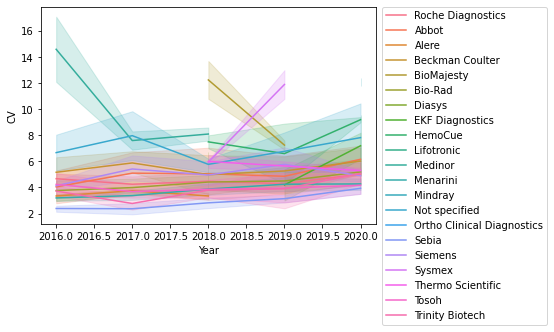

In [7]:
sns.lineplot(data=df, x="Year", y="CV", hue="Manufacturer")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [8]:
fig = px.line(df, x="Year", y="CV", title='test')
fig.show()

In [9]:
def plotCV(method):
    df3.loc[[method]].iplot(
                    xTitle='Year',
                    x = 'Year',
                    y = 'CV',
                    mode='lines+markers',
                    yTitle='CV {}'.format(method)
                    
        
                     )

In [10]:
interact(plotCV, method=df3.index.unique())

interactive(children=(Dropdown(description='method', options=('(part of cobas 6000/8000) Roche Diagnostics cob…

<function __main__.plotCV(method)>

In [11]:
def plotBias(method):
    df3.loc[[method]].iplot(
                    xTitle='Year',
                    x = 'Year',
                    y = 'Bias',
                    mode='lines+markers',
                    yTitle='Bias {}'.format(method)
                    
        
                     )

In [12]:
interact(plotBias, method=df3.index.unique())

interactive(children=(Dropdown(description='method', options=('(part of cobas 6000/8000) Roche Diagnostics cob…

<function __main__.plotBias(method)>

In [13]:
def plotBiasScatter(method):
    df4.loc[[method]].iplot(
                    xTitle='Year',
                    x = 'Year',
                    y = 'Bias',
                    mode='markers',
                    yTitle='Bias {}'.format(method)
                    
        
                     )

In [14]:
interact(plotBiasScatter, method=df3.index.unique())

interactive(children=(Dropdown(description='method', options=('(part of cobas 6000/8000) Roche Diagnostics cob…

<function __main__.plotBiasScatter(method)>

In [15]:
box_plot = px.box(
    df3,
    y="Bias", 
    x="Year", 
    color="Year", 
    title="Bias through the years", 
    points="all",
    width=900 
)

box_plot.show()

In [16]:
#boxplot 
def boxplot(method):
    # df3[['N', 'Mean', 'Bias']].loc[[method]].iplot(kind='box')
    df3[['Bias']].loc[[method]].iplot(kind='box')

interact(boxplot, method=df3.index.unique());


interactive(children=(Dropdown(description='method', options=('(part of cobas 6000/8000) Roche Diagnostics cob…